In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries Imported.")

Libraries Imported.


In [34]:
df = pd.read_csv('hotel.csv')
df.head()

,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,is_repeated_guest,reserved_room_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,July,1,0,0,2,0.0,BB,0,C,Transient,0.0,0,0
1,July,1,0,0,2,0.0,BB,0,C,Transient,0.0,0,0
2,July,1,0,1,1,0.0,BB,0,A,Transient,75.0,0,0
3,July,1,0,1,1,0.0,BB,0,A,Transient,75.0,0,0
4,July,1,0,2,2,0.0,BB,0,A,Transient,98.0,0,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   arrival_date_month           119390 non-null  object 
 1   arrival_date_day_of_month    119390 non-null  int64  
 2   stays_in_weekend_nights      119390 non-null  int64  
 3   stays_in_week_nights         119390 non-null  int64  
 4   adults                       119390 non-null  int64  
 5   children                     119386 non-null  float64
 6   meal                         119390 non-null  object 
 7   is_repeated_guest            119390 non-null  int64  
 8   reserved_room_type           119390 non-null  object 
 9   customer_type                119390 non-null  object 
 10  adr                          119390 non-null  float64
 11  required_car_parking_spaces  119390 non-null  int64  
 12  total_of_special_requests    119390 non-null  int64  
dtyp

In [36]:
df.duplicated().sum()

np.int64(41487)

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
month = df['arrival_date_month']

In [40]:
month_name = list(month.value_counts().keys())
no_of_month = list(month.value_counts().values)

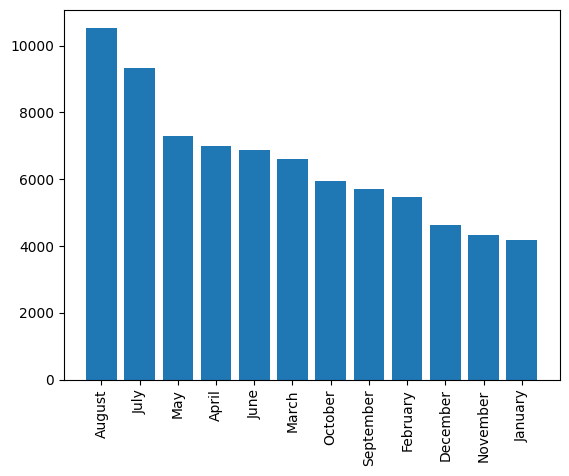

In [41]:
plt.bar(month_name,no_of_month)
plt.xticks(rotation=90)
plt.show()

In [42]:
cat_col = df.select_dtypes(include='O')
cat_col.head()

,arrival_date_month,meal,reserved_room_type,customer_type
0,July,BB,C,Transient
2,July,BB,A,Transient
4,July,BB,A,Transient
6,July,BB,C,Transient
7,July,FB,C,Transient


In [43]:
num_col = df.select_dtypes(exclude='O')
num_col.head()

,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,0,2,0.0,0,0.0,0,0
2,1,0,1,1,0.0,0,75.0,0,0
4,1,0,2,2,0.0,0,98.0,0,1
6,1,0,2,2,0.0,0,107.0,0,0
7,1,0,2,2,0.0,0,103.0,0,1


In [44]:
month_group = df.groupby('arrival_date_month')
month_record = month_group['adr'].agg(min_price='min',max_price='max',avg_price='mean')
month_record

,min_price,max_price,avg_price
arrival_date_month,,,
April,0.00,336.00,104.800795
August,0.00,450.00,153.284228
December,0.00,451.50,81.884485
February,0.00,284.20,75.423479
January,0.00,284.20,70.914249
July,0.00,508.00,137.476258
June,0.00,333.67,121.452317
March,-6.38,5400.00,82.693536
May,0.00,510.00,112.064386


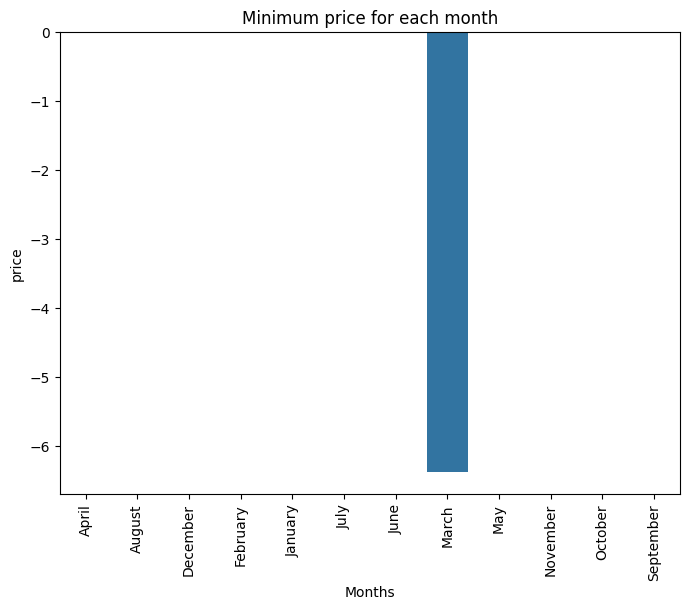

In [45]:
min_charges = df.groupby('arrival_date_month')['adr'].min().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='arrival_date_month',y='adr',data=min_charges)
plt.xticks(rotation=90)
plt.title('Minimum price for each month')
plt.xlabel('Months')
plt.ylabel('price')
plt.show()

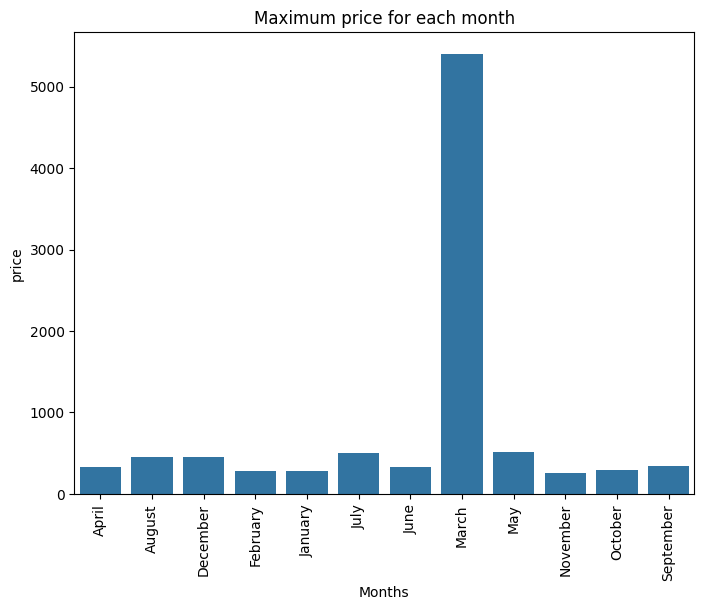

In [46]:
max_charges = df.groupby('arrival_date_month')['adr'].max().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='arrival_date_month',y='adr',data=max_charges)
plt.xticks(rotation=90)
plt.title('Maximum price for each month')
plt.xlabel('Months')
plt.ylabel('price')
plt.show()

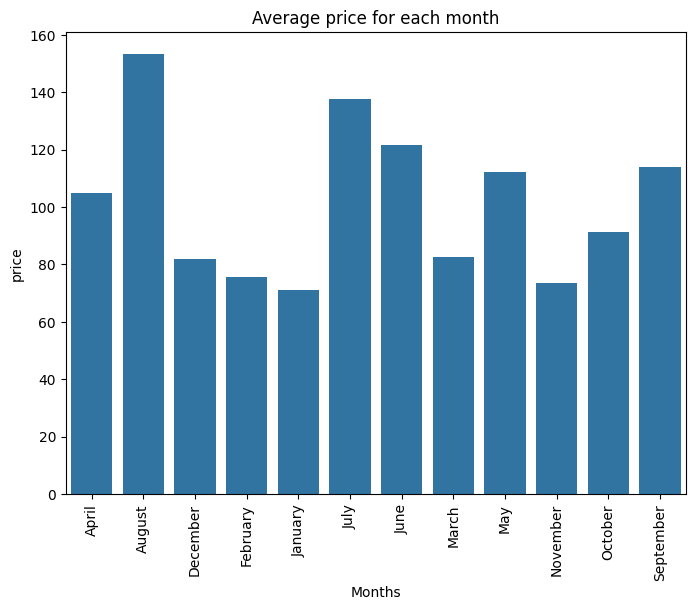

In [47]:
avg_charges = df.groupby('arrival_date_month')['adr'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='arrival_date_month',y='adr',data=avg_charges)
plt.xticks(rotation=90)
plt.title('Average price for each month')
plt.xlabel('Months')
plt.ylabel('price')
plt.show()

In [48]:
data = df.drop(columns=['stays_in_weekend_nights','stays_in_week_nights'])
data.head()

,arrival_date_month,arrival_date_day_of_month,adults,children,meal,is_repeated_guest,reserved_room_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,July,1,2,0.0,BB,0,C,Transient,0.0,0,0
2,July,1,1,0.0,BB,0,A,Transient,75.0,0,0
4,July,1,2,0.0,BB,0,A,Transient,98.0,0,1
6,July,1,2,0.0,BB,0,C,Transient,107.0,0,0
7,July,1,2,0.0,FB,0,C,Transient,103.0,0,1


In [49]:
df2 = pd.get_dummies(data,drop_first='if_binary')
df2.head()

,arrival_date_day_of_month,adults,children,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,...,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,2,0.0,0,0.0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,1,0.0,0,75.0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,2,0.0,0,98.0,0,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,1,2,0.0,0,107.0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,1,2,0.0,0,103.0,0,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [50]:
x = df2.drop('adr',axis=1)
y = df2['adr']
x.head()

,arrival_date_day_of_month,adults,children,is_repeated_guest,required_car_parking_spaces,total_of_special_requests,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,...,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,2,0.0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,1,0.0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,2,0.0,0,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,1,2,0.0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,1,2,0.0,0,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [51]:
# training and testing split..
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [53]:
# model or algorithm training...
from sklearn.ensemble import RandomForestRegressor

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
rdr = RandomForestRegressor()

# training algorithm...

rdr.fit(x_train,y_train)
print("RandomForestRegressor successfully trained.")

print("RandomForestRegressor Training score: ",rdr.score(x_train,y_train) * 100)
print("RandomForestRegressor Testing score: ",rdr.score(x_test,y_test) * 100)

RandomForestRegressor successfully trained.
RandomForestRegressor Training score:  67.07688682961191
RandomForestRegressor Testing score:  52.82814894746879


In [56]:
import joblib,os

In [57]:
os.makedirs('models',exist_ok=True)

In [58]:
joblib.dump(rdr,"./models/randomforest_model.lb")
print("successfully saved your algorithm at this location : ./models/randomforest_model")

successfully saved your algorithm at this location : ./models/randomforest_model


In [59]:
randomforest_prediction = rdr.predict(x_test)

In [60]:
compare_df = pd.concat([x_test,y_test],axis='columns')
compare_df['randomforest_prediction'] = randomforest_prediction
compare_df.head()

,arrival_date_day_of_month,adults,children,is_repeated_guest,required_car_parking_spaces,total_of_special_requests,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,adr,randomforest_prediction
9855,14,2,0.0,0,0,1,False,False,False,True,...,False,False,False,False,False,False,True,False,78.00,81.020267
22377,21,2,0.0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,True,False,80.00,115.618447
42175,2,2,0.0,0,0,2,False,False,False,False,...,False,False,False,False,False,False,False,False,114.50,103.807000
113848,9,2,0.0,0,0,2,False,False,False,False,...,False,False,False,False,False,False,True,False,150.00,113.872769
49246,8,2,1.0,0,0,1,False,False,False,False,...,False,False,False,False,False,False,True,False,96.13,94.007033


In [61]:
os.makedirs('prediction',exist_ok=True)

In [62]:
compare_df.to_csv('./prediction/.prediction.csv',index=False)
print('saved')

saved
